<a href="https://colab.research.google.com/github/GhaziFadhlullah/DIF62130_B-_25_2311532012/blob/main/Pratikum5/Dimensionality%20Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)


Number of samples: 150
Number of features: 4


Kode ini memuat dataset Iris dari pustaka scikit-learn, lalu memisahkan data fitur ke dalam variabel X dan label kelas ke dalam y. Setelah itu, kode menghitung jumlah sampel (baris) dan jumlah fitur (kolom) dari X menggunakan X.shape, lalu mencetak keduanya. Dataset ini berisi data bunga dengan empat fitur dan tiga kelas spesies.

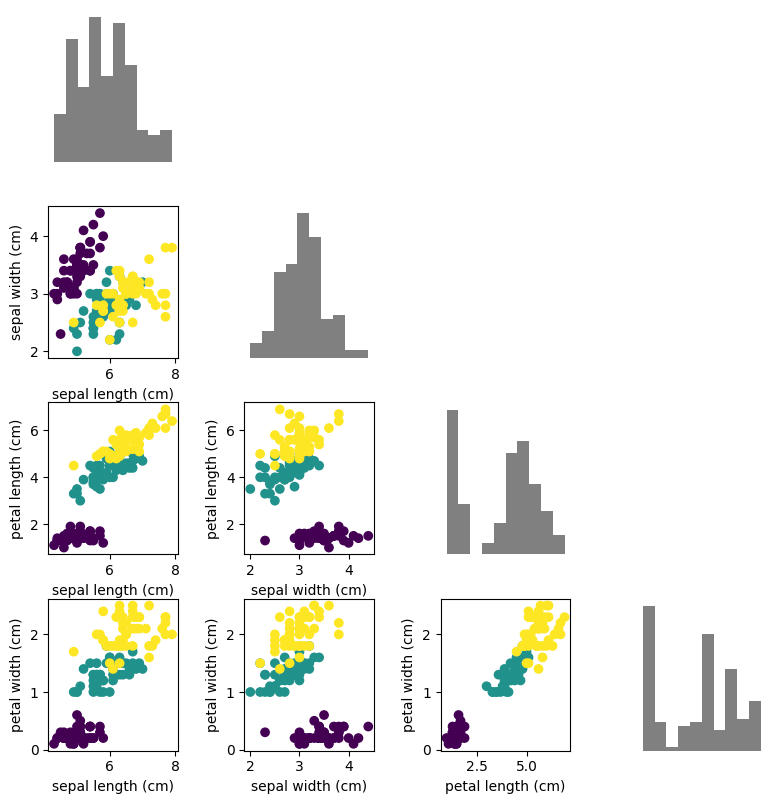

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize=(8, 8))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, i], X[:, j], c=y)
    ax[j, i].set_xlabel(names[i])
    ax[j, i].set_ylabel(names[j])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(X[:, i], color = 'grey')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])
    ax[i, i].set_axis_off()


Kode ini membuat visualisasi hubungan antar fitur dataset Iris. Scatter plot ditampilkan untuk setiap pasangan fitur berbeda, dengan warna berdasarkan kelas. Diagonal subplot menampilkan histogram distribusi tiap fitur. Hasilnya adalah matriks grafik yang menunjukkan pola dan sebaran data secara menyeluruh.

In [31]:
def mean(x): # np.mean(X, axis = 0)
    return sum(x) / len(x)

def std(x): # np.std(X, axis=0)
    return (sum((i - mean(x))**2 for i in x) / len(x))**0.5

def Standardize_data(x):
    return (x - mean(x)) / std(x)

X_std = Standardize_data(X)

In [34]:
print(X)
print(X_std)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Kode ini membuat tiga fungsi manual untuk meniru fungsi-fungsi statistik dari NumPy, lalu digunakan untuk menstandarkan data (standardization), yaitu mengubah data agar memiliki rata-rata 0 dan standar deviasi 1.

Fungsi mean(x) menghitung rata-rata dari array x, setara dengan np.mean(x, axis=0).
Fungsi std(x) menghitung standar deviasi dari x, yaitu akar dari varians.
Fungsi Standardize_data(x) melakukan proses standarisasi: setiap elemen dikurangi dengan rata-rata dan dibagi dengan standar deviasi.

Namun, kode ini hanya cocok untuk satu dimensi data (1D array). Karena X adalah array 2D (banyak fitur), fungsi-fungsi tersebut tidak bisa langsung bekerja seperti pada NumPy yang mendukung operasi per kolom (axis=0).

In [36]:
def covariance(x):
  return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std) #np.cov(X_std.T)


In [37]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Fungsi covariance(x) pada kode ini menghitung matriks kovarians dari data x secara manual. Kovarians mengukur hubungan linear antar fitur.

Cara kerjanya: data x ditranspos (x.T) dan dikalikan dengan x, lalu dibagi dengan jumlah sampel dikurangi 1 (x.shape[0] - 1) agar sesuai dengan rumus statistik kovarians.

Pemanggilan cov_mat = covariance(X_std) menghitung matriks kovarians dari data X_std, yaitu versi standar (sudah dinormalisasi) dari X.

Komentar #np.cov(X_std.T) menunjukkan bahwa hasilnya setara dengan fungsi built-in np.cov, yang juga digunakan untuk menghitung kovarians.











In [45]:
from numpy.linalg import eig
import numpy as np

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# #Adjusting the eigenvectors (loadings) that are largest in absolute value to be position
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[1])])
eig_vecs = eig_vecs * signs[np.newaxis, :]
eig_vecs = eig_vecs.T

print('Eigenvalues:\n', eig_vals)
print('Eigenvectors:\n', eig_vecs)



Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


Kode ini melakukan eigendecomposition pada matriks kovarians cov_mat untuk mendapatkan eigenvalue dan eigenvector, yang digunakan dalam PCA.

Eigenvalue menunjukkan besar varian yang dijelaskan oleh masing-masing komponen, sedangkan eigenvector menunjukkan arah komponen utama.

Agar konsisten, arah eigenvector disesuaikan: komponen dengan nilai absolut terbesar di setiap vektor dijadikan positif. Lalu, hasilnya ditranspos agar tiap baris menjadi satu eigenvector.

In [48]:
# we first mae a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i, :]) for i in range(len(eig_vals))]

# then we short the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

#for further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)


[(np.float64(2.9380850501999918), array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (np.float64(0.920164904162487), array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (np.float64(0.14774182104494785), array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (np.float64(0.020853862176462023), array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


Kode ini membuat daftar pasangan eigenvalue dan eigenvector, lalu mengurutkannya berdasarkan nilai eigen terbesar ke terkecil. Setelah itu, nilai dan vektor yang sudah terurut dipisah kembali ke dalam array terpisah untuk dipakai selanjutnya. Kode ini penting untuk memilih komponen utama PCA berdasarkan variansi terbesar. Perbaikan yang dilakukan adalah memperbaiki penulisan reverse agar pengurutan berjalan benar.











In [50]:
k = 2
w = eig_vecs_sorted[:k, :]
print (w.shape)

(2, 4)


Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


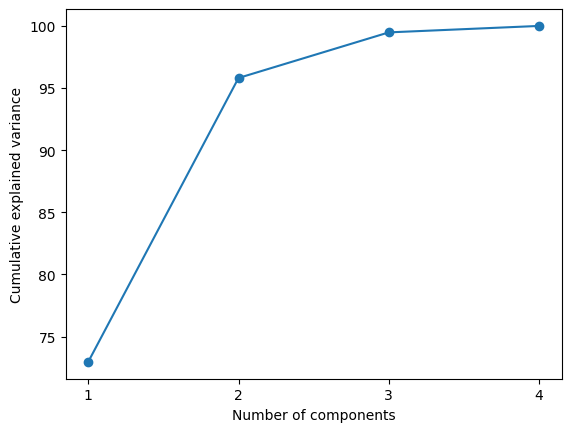

In [51]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

Kode ini menghitung persentase variansi yang dijelaskan oleh setiap komponen utama dari hasil PCA dengan membagi setiap eigenvalue dengan total jumlah eigenvalue, kemudian mengalikannya dengan 100 untuk mendapatkan persen. Nilai ini kemudian dibulatkan agar lebih rapi. Selanjutnya, kode menghitung variansi kumulatif yang menunjukkan total variansi yang dijelaskan jika menggunakan sejumlah komponen tertentu. Hasil ini dicetak dan juga divisualisasikan dalam grafik garis yang menunjukkan bagaimana variansi kumulatif bertambah seiring bertambahnya jumlah komponen, membantu menentukan berapa banyak komponen yang cukup untuk merepresentasikan data secara efektif.

In [67]:
X_proj = X_std.dot(w.T)

print(X_proj.shape)
print(X.shape)

(150, 2)
(150, 4)


Kode ini memproyeksikan data standar x_std ke ruang baru menggunakan eigenvector di W, sehingga mengubah dimensi data sesuai komponen utama PCA. print menampilkan ukuran data hasil proyeksi dan data asli untuk perbandingan.

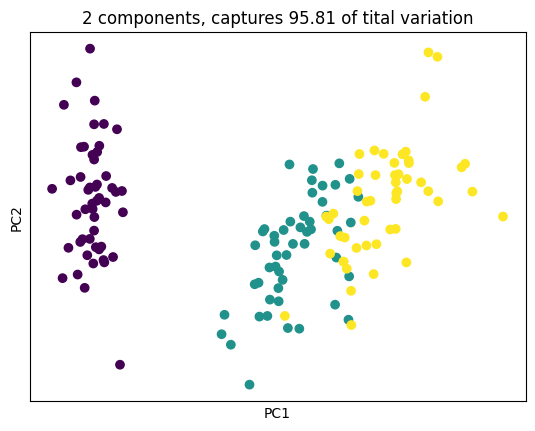

In [70]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of tital variation'.format(cum_explained_variance[1]))
plt.show()

Kode ini membuat scatter plot dari data yang sudah diproyeksikan ke dua komponen utama pertama (PC1 dan PC2). Setiap titik diberi warna sesuai dengan kelas aslinya (y). Label sumbu dan judul plot ditambahkan, di mana judul menampilkan persentase variansi total yang ditangkap oleh dua komponen utama tersebut. Akhirnya, plot ditampilkan untuk visualisasi distribusi data dalam ruang dua dimensi hasil PCA